In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

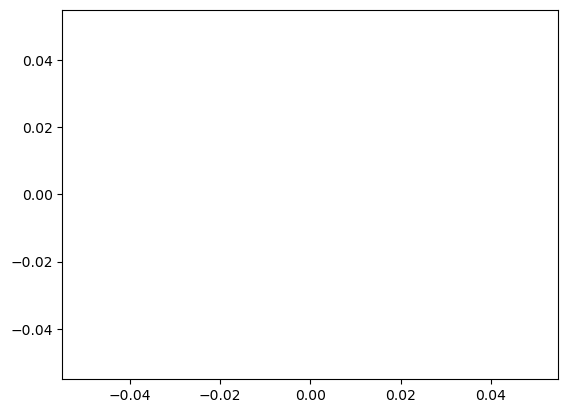

In [2]:
# Creating empty plot
plt.plot(); # semicolon to get rid of the empty array/list output

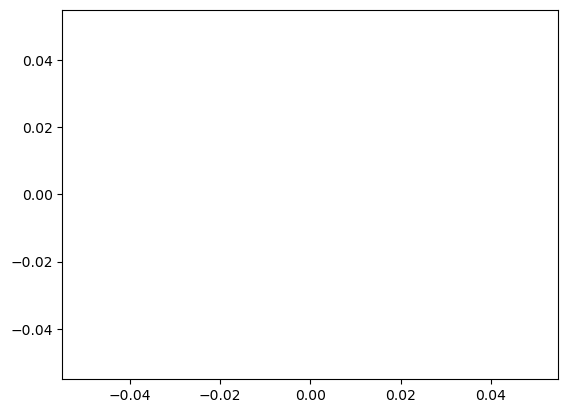

In [3]:
# another way without the semicolon to create an empty plot
plt.plot()
plt.show()

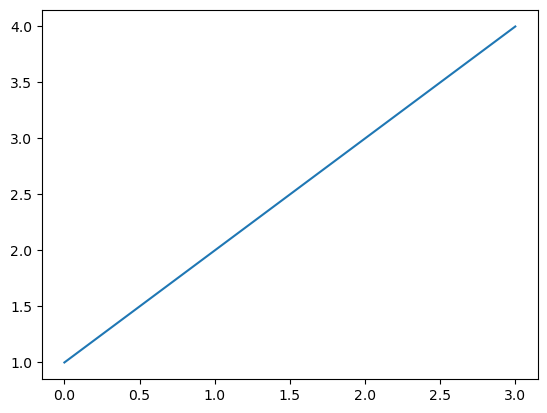

In [4]:
# Adding Data
plt.plot([1,2,3,4])

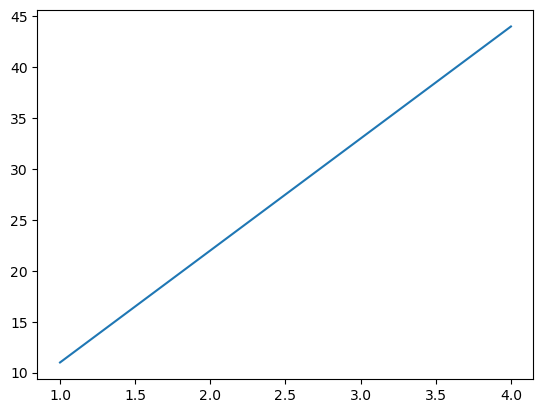

In [5]:
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y)

### 3 way of creating plot:

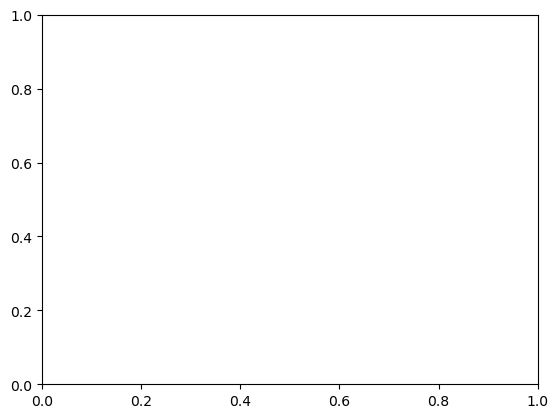

In [6]:
# method 1:
fig = plt.figure() # Creates a figuare
ax = fig.add_subplot() # adds some axes
plt.show()

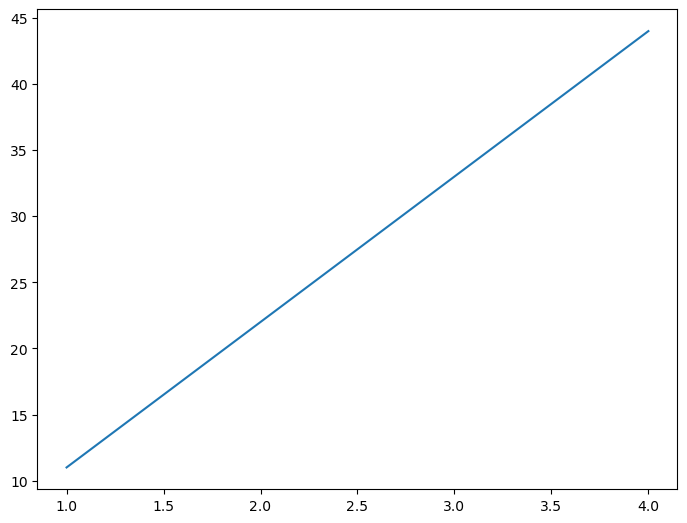

In [7]:
# method 2:
fig = plt.figure() # Creates a figure
ax = fig.add_axes([1,1,1,1]) # rect def as tuple or array (left, bottom, width, height)
ax.plot(x,y) # adds some data
plt.show()

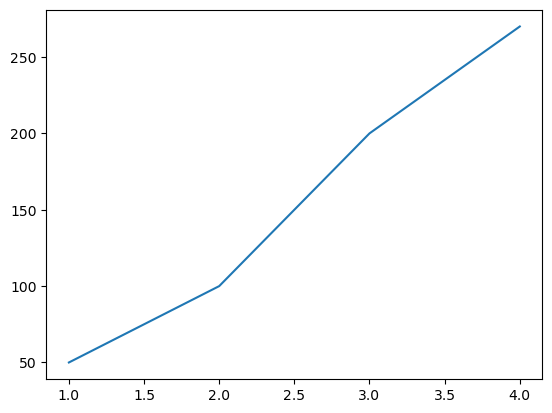

In [8]:
# method 3rd: Best Case (Object Oriented)
fig, ax = plt.subplots()
ax.plot(x, [50,100,200, 270])

### Anatomy:
- Figure: it's the actual canvas (container). Figure can contain multiple Axises
- Axis: it's the plot. If there is multiple axises, each can hold separate data and labling.

### Workflows:

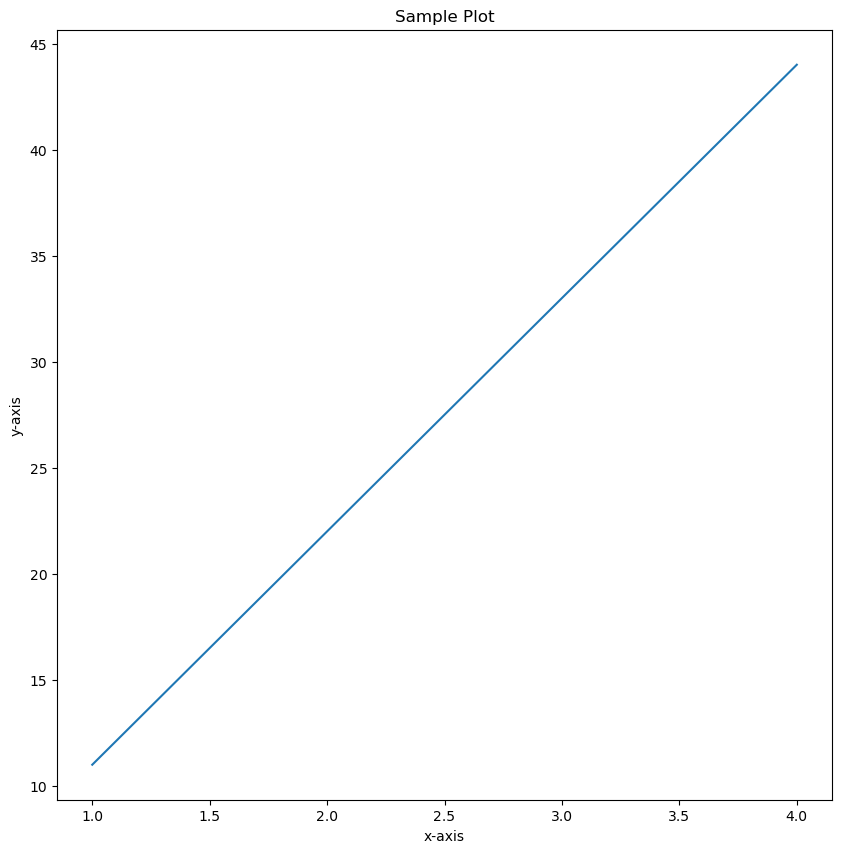

In [9]:
# 0. import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare Data
x = [1,2,3,4]
y = [11,22,33,44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10)) # figure size as width x height

# 3. Plot the data
ax.plot(x,y)

# 4. Customize plot
ax.set(title="Sample Plot", xlabel="x-axis", ylabel="y-axis")

# 5. Save plot as image.png (save the whole figure)
fig.savefig("./images/sample-plot.png")

### Figures with NumPy arrays:
- Line Plot
- Scatter Plot (Axes.scatter(x,y)
- Bar Plot : Axes.bar (vertical) & Axes.barh (horizontal)
- Histogram
- Subplots

In [10]:
import numpy as np

# Create some data
# linspace : Return evenly spaced numbers over a specified interval
# np.linspace(start, stop,num=50,...)
x = np.linspace(0, 10, 100)
x.size, type(x), x.dtype, x.shape, x.ndim

(100, numpy.ndarray, dtype('float64'), (100,), 1)

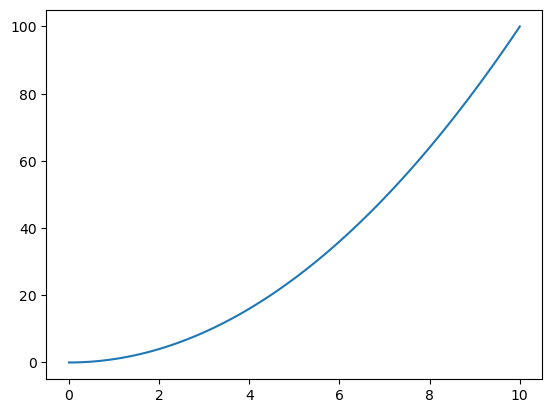

In [11]:
# Plot the data
fig, ax = plt.subplots()
ax.plot(x, x ** 2)

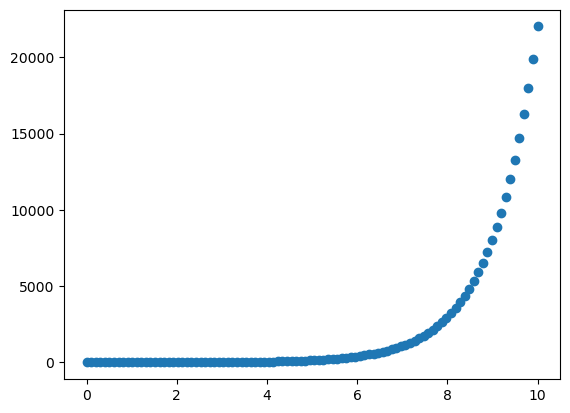

In [12]:
# Scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x))

In [13]:
# Exponential is the : (Euler's number) ** n
# Euler's number : 2.718281828459045
np.exp(2), np.log(np.exp(2)), np.exp(1), np.exp(1) ** 2,

(7.38905609893065, 2.0, 2.718281828459045, 7.3890560989306495)

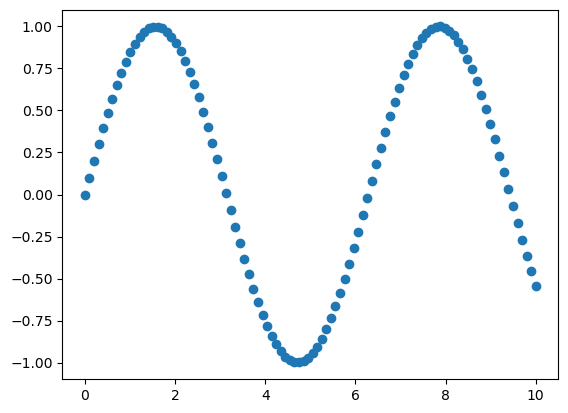

In [14]:
# Scatter Plot : 2
fig, ax = plt.subplots() # Create both Figure and a subplot (axis) by default
ax.scatter(x, np.sin(x))

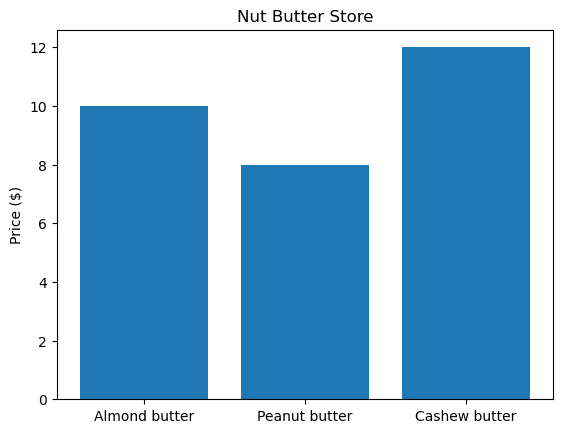

In [15]:
# Bar plot from a dictionary
nut_butter_prices = {"Almond butter": 10, "Peanut butter": 8, "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Nut Butter Store", ylabel="Price ($)")
plt.show()

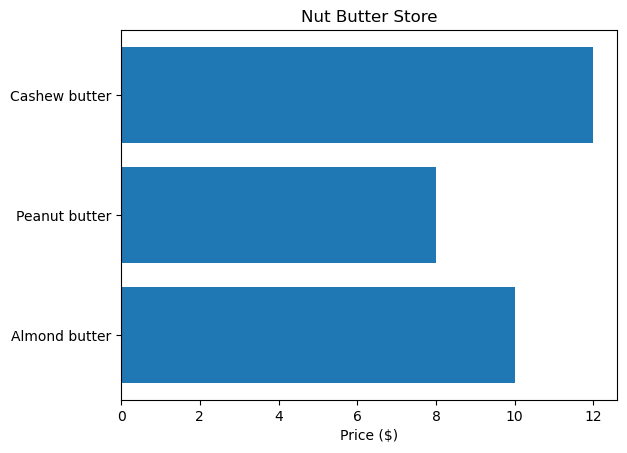

In [16]:
# horizontal bar plot
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()))
ax.set(title="Nut Butter Store", xlabel="Price ($)");

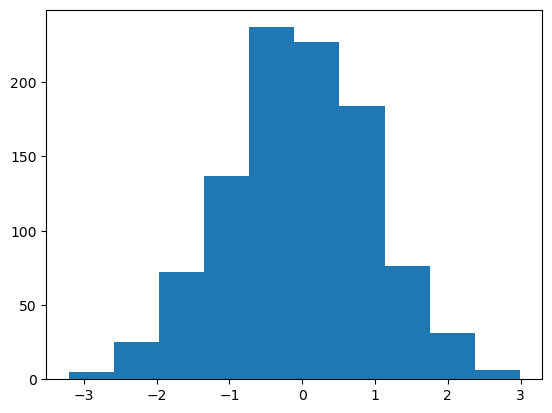

In [17]:
# Histogram from standard normal distribution data
# randn to create univariate/standard "normal" (Gaussian) distribution data
# Standard Normal Distribution is a symmetrical like curve
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

### Multiple Subplots/Axis:

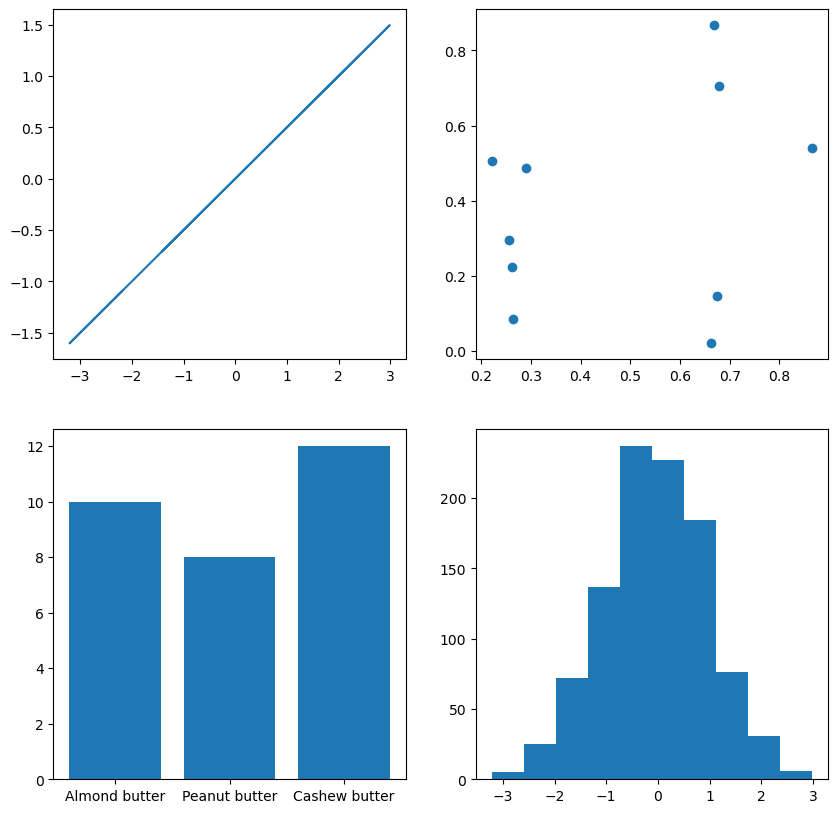

In [18]:
# Subplots option 1
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# plot to each different axis (inject data)
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(x, bins=10);

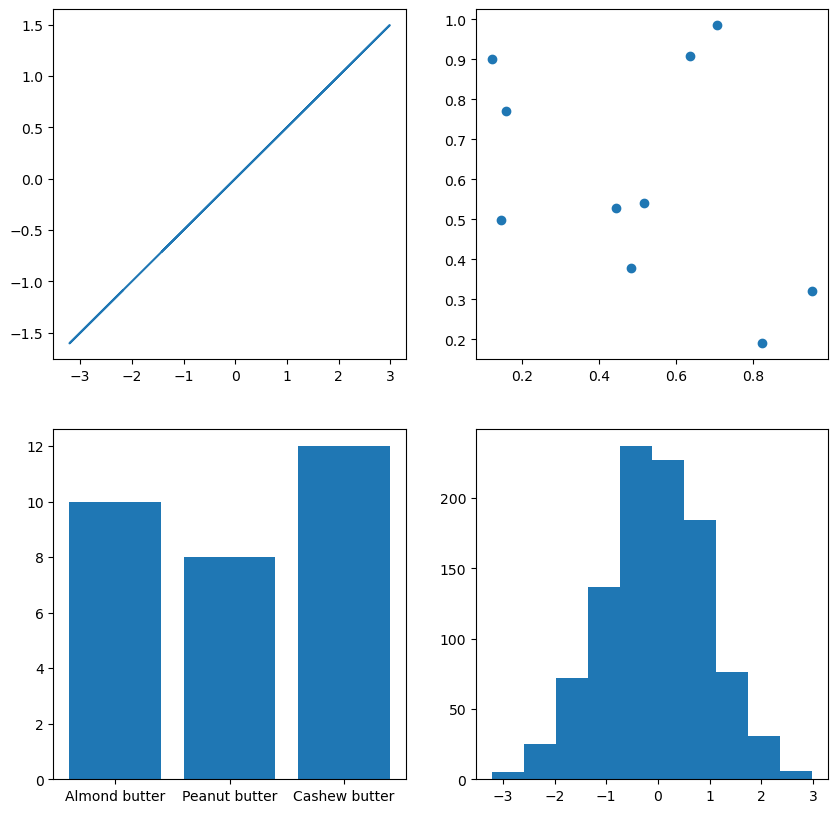

In [19]:
# Subplots Option: 2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# plot to each different axis (inject data)
ax[0,0].plot(x, x/2);
ax[0,1].scatter(np.random.random(10), np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1,1].hist(x);

### Ploting from Pandas DataFrame:
The plot method on Series and DataFrame is just a simple wrapper around plt.plot() where (import matplotlib.pyplot as plt).

In [20]:
import pandas as pd

In [21]:
# make data frame
car_sales = pd.read_csv("car-sales.csv")
car_sales.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


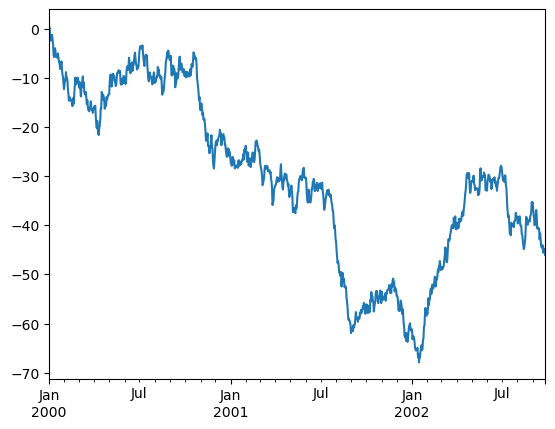

In [22]:
np.random.seed(123456)
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

In [23]:
# Cumulative Sum: sum of a given sequence that is increasing or getting bigger with more additions
arr = np.array([1,2,3,4])
arr, arr.cumsum()

(array([1, 2, 3, 4]), array([ 1,  3,  6, 10]))

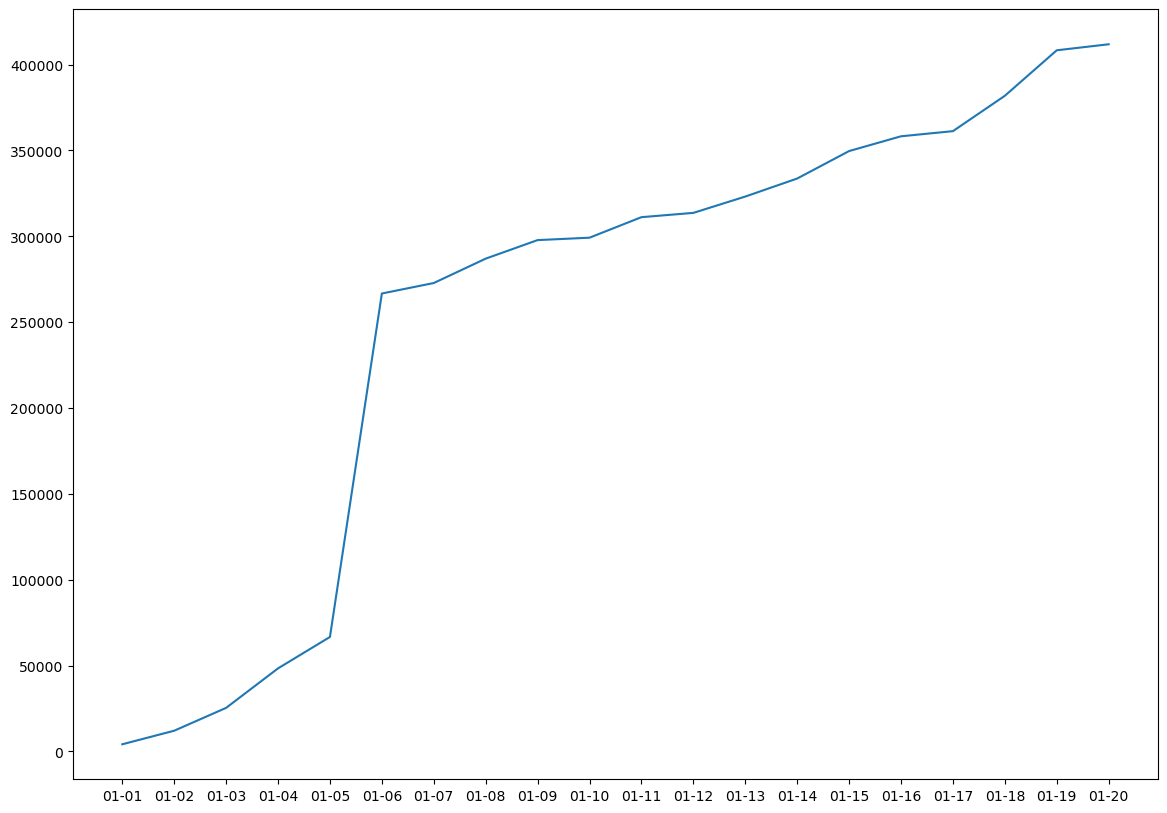

In [24]:
# Apply car_sales data for visualization with cumsum
car_sales_20 = car_sales[:20].copy()
car_sales_20["Sale Date"] = pd.date_range("1/1/2023", periods=20)
car_sales_20_nan_filled = car_sales_20["Price"].fillna(car_sales_20["Price"].mean())

# Create Figure and subplot
fig, ax = plt.subplots(figsize=(14,10))

# get only month and day
car_sales_20_md = car_sales_20["Sale Date"].apply(lambda x: x.strftime("%m-%d"))
ax.plot(car_sales_20_md, car_sales_20_nan_filled.cumsum());

<Axes: xlabel='Sale Date'>

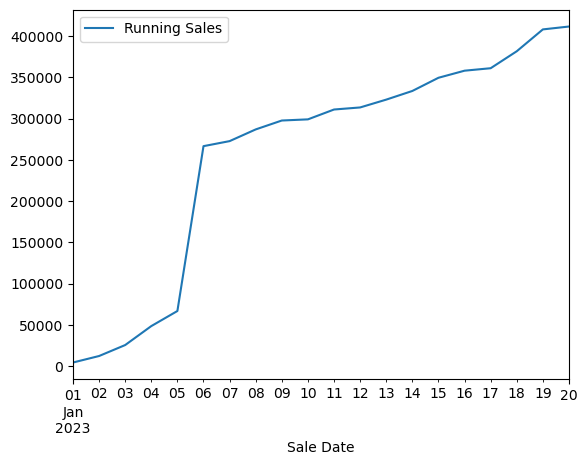

In [25]:
# Direct ploting from DataFrame
car_sales_scatter = car_sales[:20].copy()
car_sales_scatter["Sale Date"] = pd.date_range("1/1/2023", periods=20)
car_sales_scatter["Running Sales"] = car_sales_scatter["Price"].fillna(car_sales_scatter["Price"].mean()).cumsum()
car_sales_scatter.plot("Sale Date", "Running Sales")

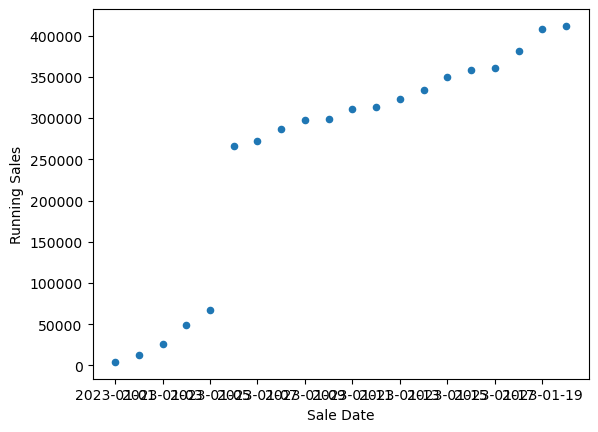

In [26]:
# visualize as histogram
car_sales_scatter.plot("Sale Date", "Running Sales", kind="scatter");

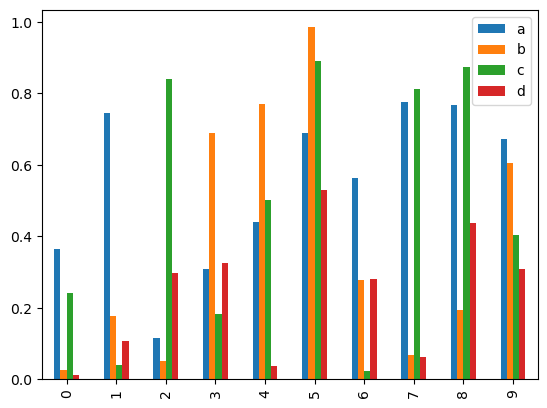

In [27]:
# bar graph
x = np.random.rand(10, 4)
df = pd.DataFrame(x, columns=['a','b','c','d'])
df.plot.bar();

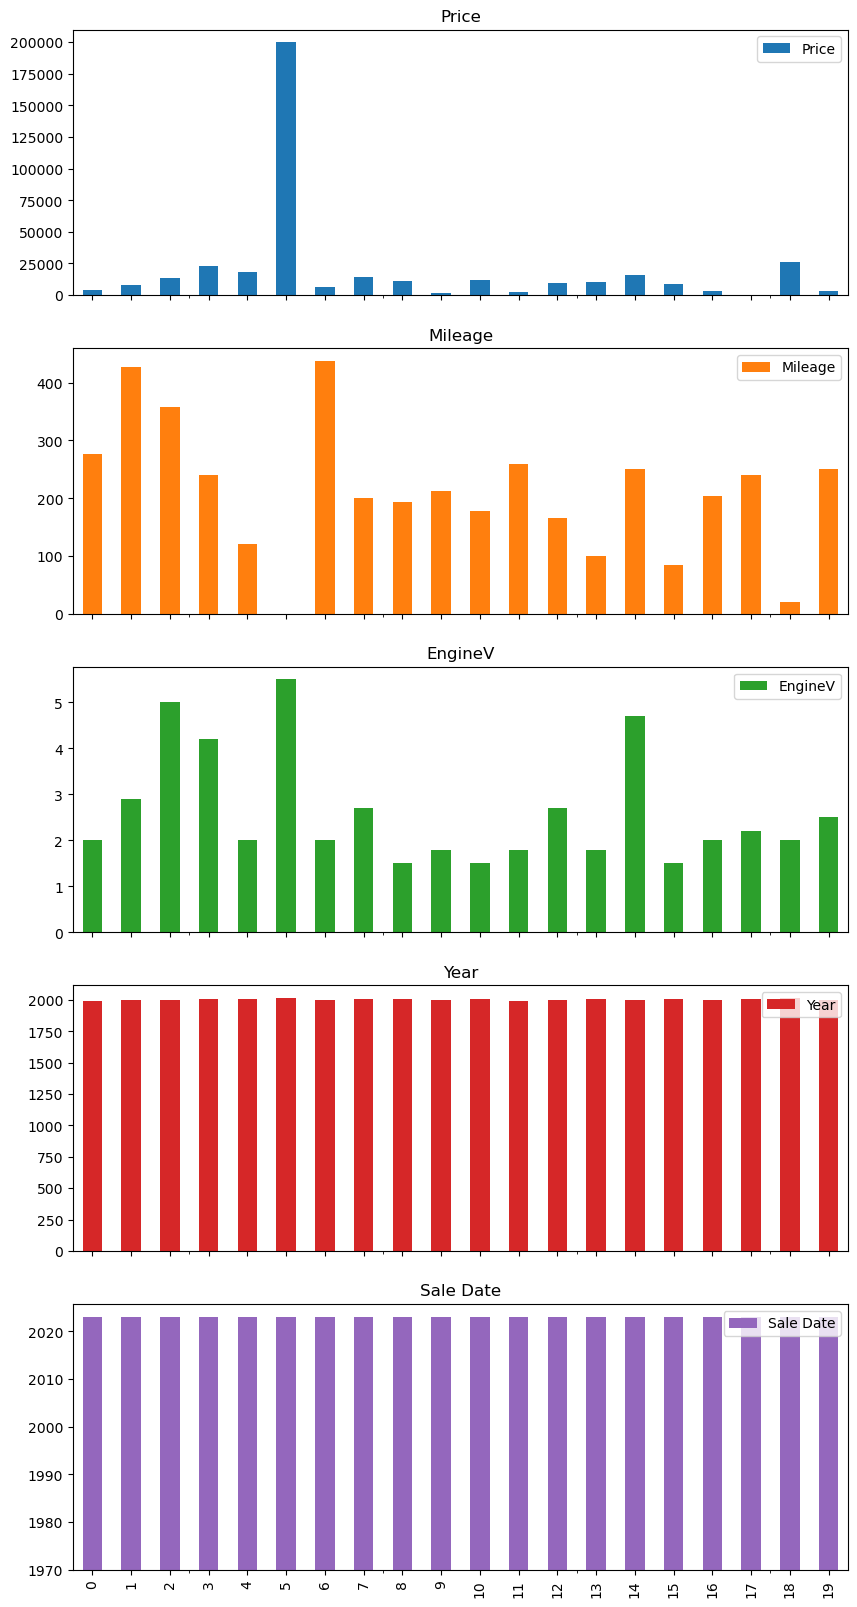

In [28]:
# multiple subplots form DataFrame
car_sales_20.plot.bar(figsize=(10, 20),subplots=True);

### Pandas DF Ploting Using OO:
- when oo : doing advanced ploting
- when non-oo : some quick simple ploting

(0.0, 700.0)

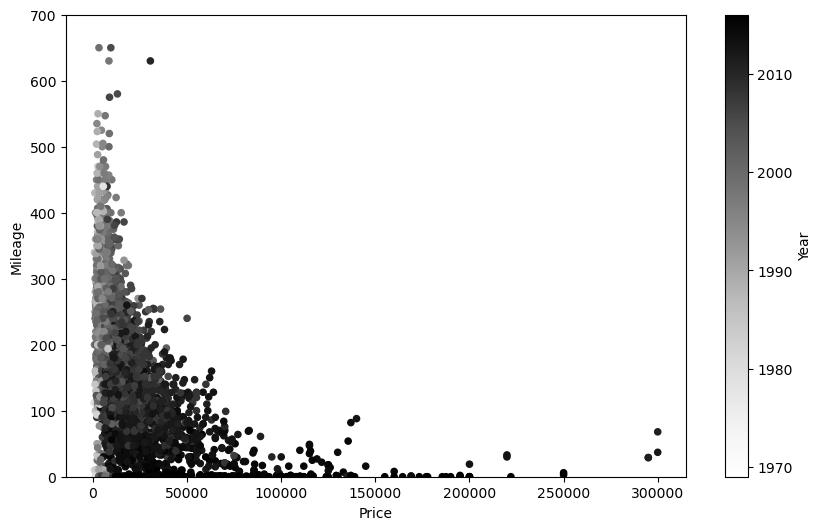

In [36]:
# OO hack method: not fully OO
fig, ax = plt.subplots(figsize=(10,6))
car_sales.plot(kind="scatter", x="Price", y="Mileage", c="Year", ax=ax);
ax.set_ylim([0,700])

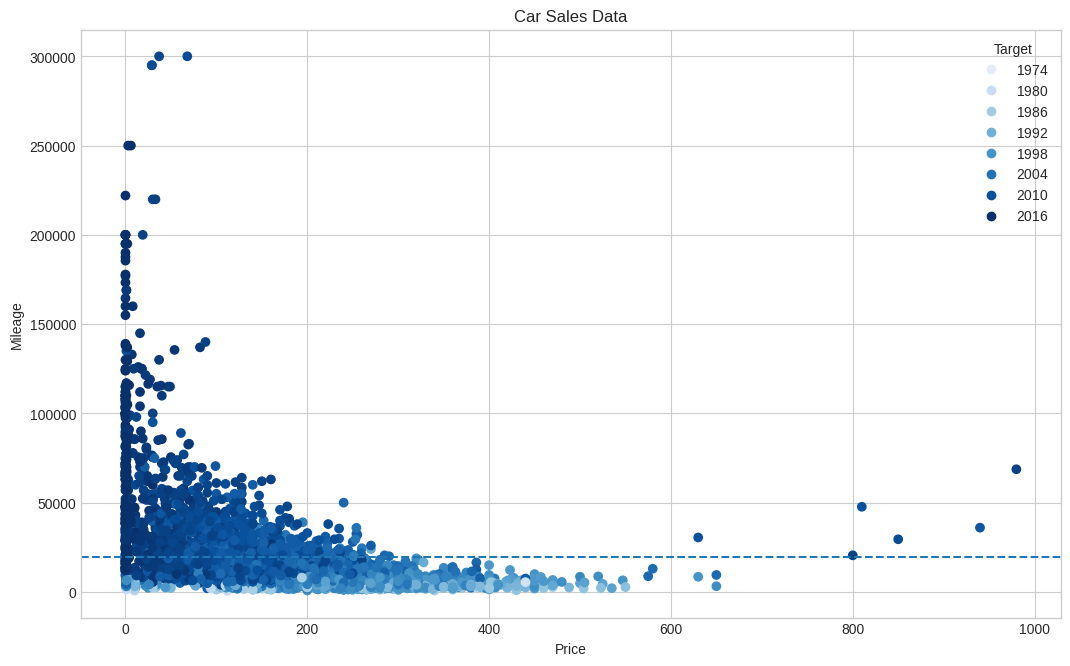

In [60]:
# Object Oriented Way:
fig, ax = plt.subplots(figsize=(10,6))
# plot the data
scatter = ax.scatter(x=car_sales["Mileage"],y=car_sales["Price"],c=car_sales["Year"])
# lim for limitation
# ax.set_ylim([0,700])
# Customize
ax.set(title="Car Sales Data",
      xlabel="Price",
      ylabel="Mileage")

# Adding Legend
ax.legend(*scatter.legend_elements(), title="Target")

# Adding a horizontal line on axis to show average price
ax.axhline(car_sales["Price"].mean(),linestyle="--");

### Customization InDepth:
- browse color maps: docs to matplotlib color map

In [59]:
# Show all the available style/themes
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

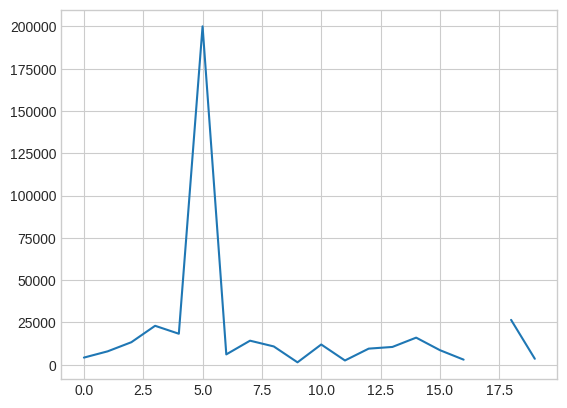

In [51]:
car_sales_20["Price"].plot();

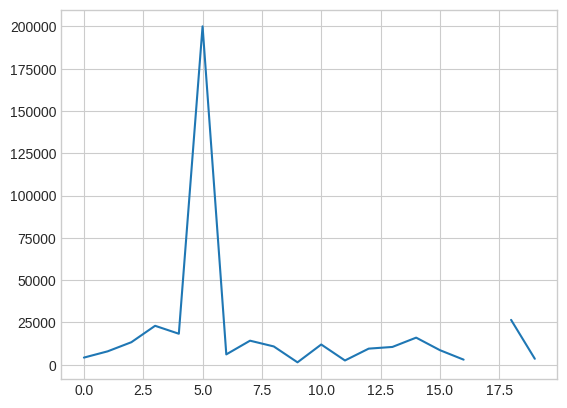

In [52]:
# applying different style
plt.style.use('seaborn-v0_8-whitegrid')
car_sales_20["Price"].plot();

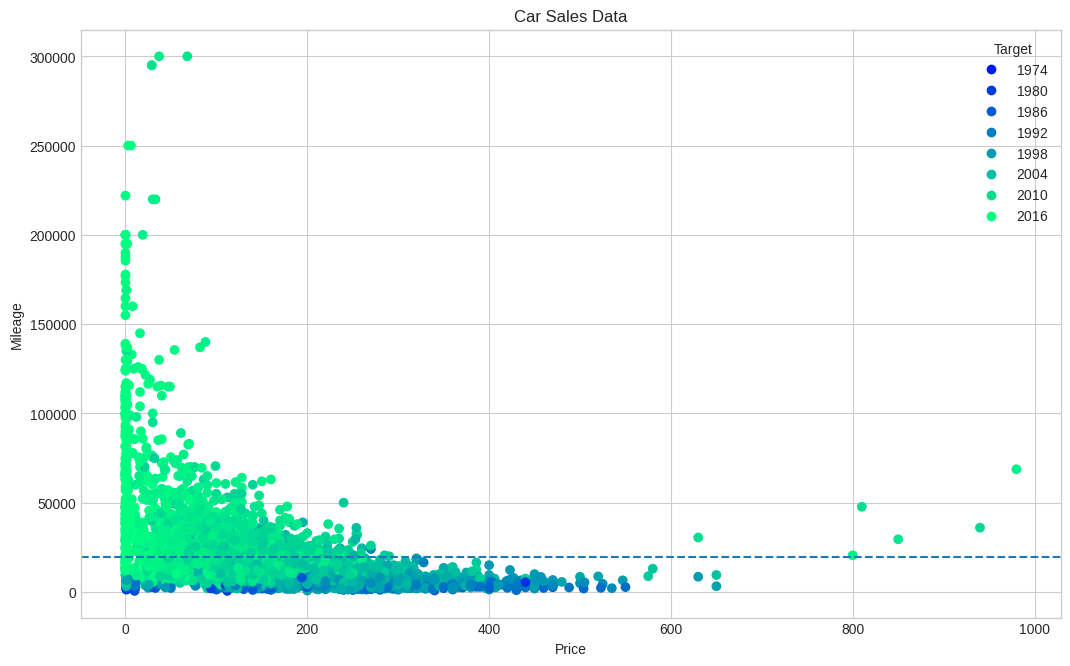

In [61]:
# Customizing styles:
plt.style.use("_mpl-gallery")
# Object Oriented Way:
fig, ax = plt.subplots(figsize=(10,6))
# plot the data
scatter = ax.scatter(x=car_sales["Mileage"],
                     y=car_sales["Price"],
                     c=car_sales["Year"],
                     cmap="winter" # Changing color scheme
                    )
# ax.set_ylim([0,700])
# Customize
ax.set(title="Car Sales Data",
      xlabel="Price",
      ylabel="Mileage")

# Adding Legend
ax.legend(*scatter.legend_elements(), title="Target")

# Adding a horizontal line on axis to show average price
ax.axhline(car_sales["Price"].mean(),linestyle="--");